> 영국왕 수명

In [1]:
#영국왕들의 수명 데이터
import pandas as pd
df = pd.read_csv('c:/vscode/data/time/kings.dat',header=None,names=['age'])
df.head()

,age
0,60
1,43
2,67
3,50
4,56


<AxesSubplot:>

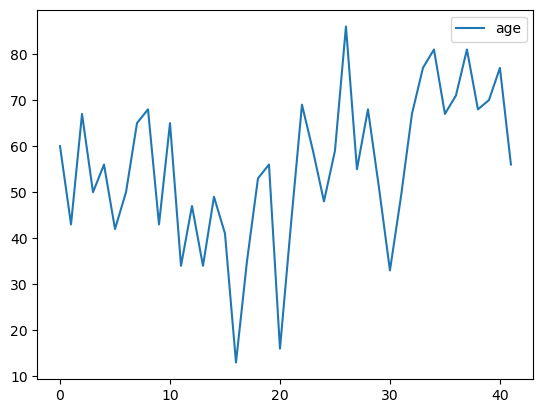

In [2]:
df.plot()

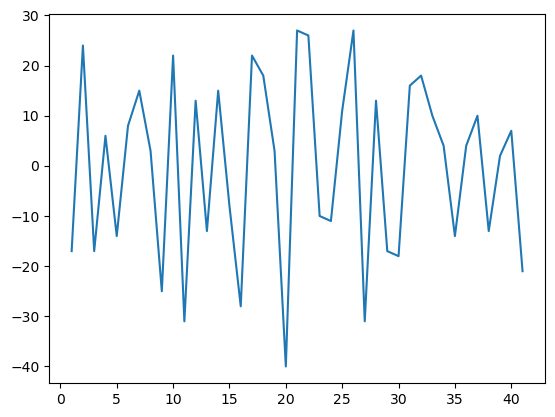

In [4]:
import matplotlib.pyplot as plt

#1차 차분을 통해 데이터를 정상화하는 과정
diff1=df['age'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1=np.log(df['age']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-7.446856429613951, 5.807660899733685e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.20496009678498)
ADF Statistic: -7.446856
p-value: 0.000000


In [6]:
result = adfuller(df)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-4.090229860104913, 0.0010051728027032974, 0, 41, {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}, 263.5882454953018)
ADF Statistic: -4.090230
p-value: 0.001005


In [28]:
# 가장 적절한 arima 모델을 추천해주는 함수
from pmdarima.arima import auto_arima
model = auto_arima(df)
model
#가장 적절한 모형은 arima(0,1,1)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
#학습용,검증용 구분
train = df[:30]
test = df[30:]
print(len(df['age']))
print(df['age'].values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]


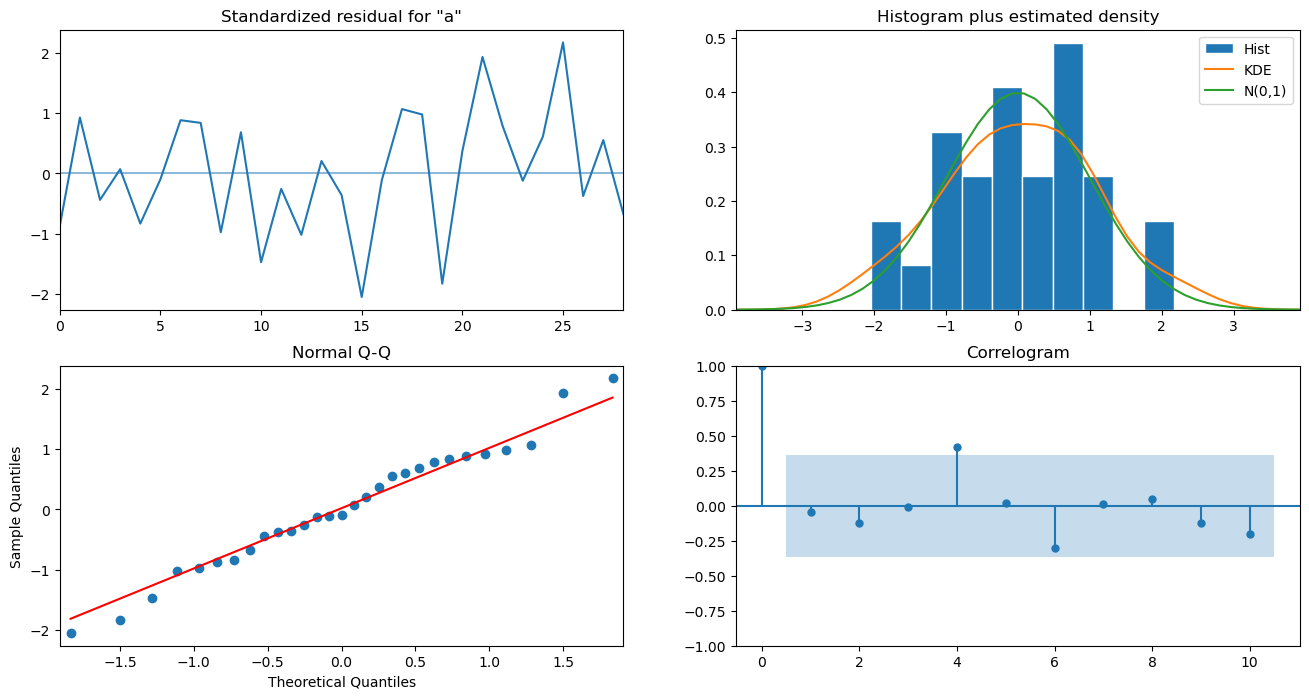

In [30]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(0,1,1)).fit()
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [31]:
predictions = model.predict(start=1, end=len(test), dynamic=False)
predictions.index=len(train)+(predictions.index-1)
predictions

30    59.989111
31    51.115646
32    57.169734
33    54.861844
34    55.195907
35    51.513504
36    51.102642
37    54.818956
38    58.314968
39    54.271040
40    57.097169
41    51.021130
Name: predicted_mean, dtype: float64

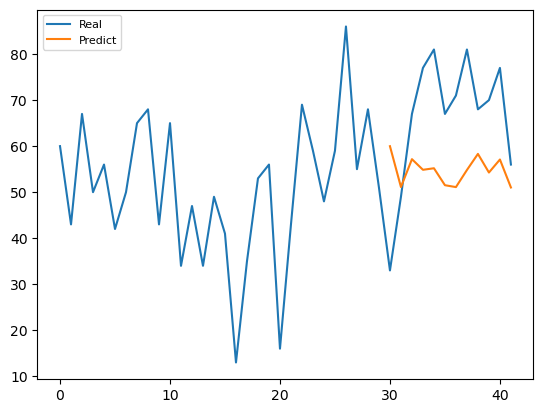

In [32]:
plt.plot(df,label='Real')
plt.plot(predictions,label='Predict')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [34]:
# 오차 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
rmse

18.413687584277653

> 나일강 유량 예측

In [36]:
df = pd.read_csv('c:/vscode/data/time/nile.csv')

<AxesSubplot:>

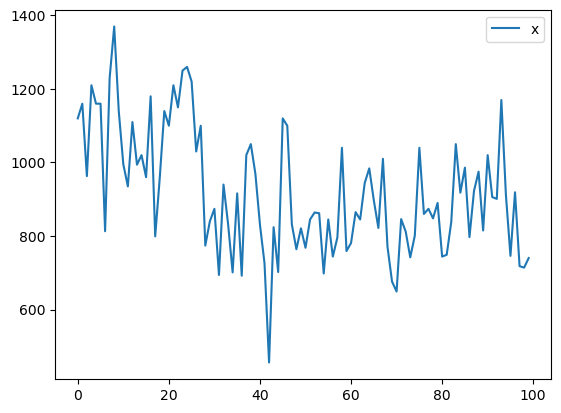

In [37]:
df.plot()

<AxesSubplot:>

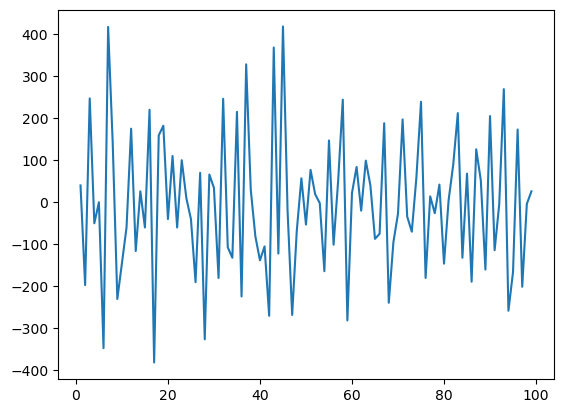

In [38]:
#1차 차분 데이터
diff1=df['x'].diff(periods=1).iloc[1:]
diff1.plot()

In [39]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1=np.log(df['x']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-4.748414786012475, 6.818878743916672e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -64.46023083112888)
ADF Statistic: -4.748415
p-value: 0.000068


In [45]:
result=adfuller(df)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-4.048705096914344, 0.001175887950387114, 1, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, 1105.1138521639623)
ADF Statistic: -4.048705
p-value: 0.001176


In [40]:
from pmdarima.arima import auto_arima
model = auto_arima(df,suppress_warnings=True)
model

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
#학습용,검증용 구분
n=int(df.shape[0]*.8)
train = df[:n]
test = df[n:]

In [43]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1)).fit()
predictions = model.predict(start=1, end=len(test), dynamic=False)
predictions.index=len(train)+(predictions.index-1)

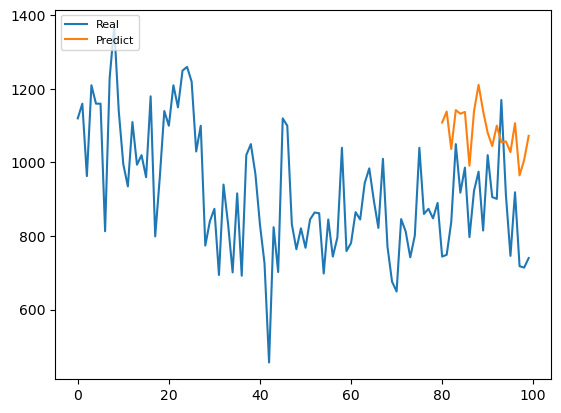

In [44]:
import matplotlib.pyplot as plt
plt.plot(df,label='Real')
plt.plot(predictions,label='Predict')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [46]:
# 오차 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
rmse

236.3149704215724

> 오존량 예측

In [47]:
df = pd.read_csv('c:/vscode/data/ozone/ozone2.csv')

<AxesSubplot:>

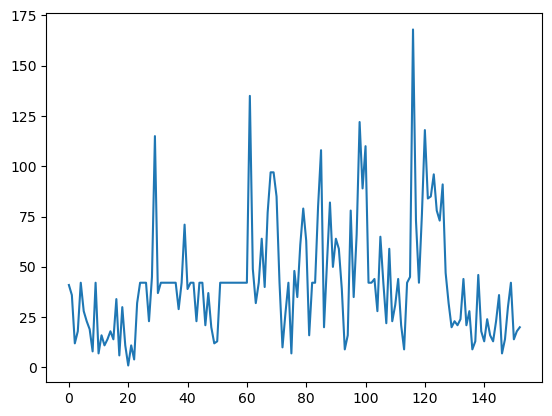

In [48]:
df['Ozone'].plot()

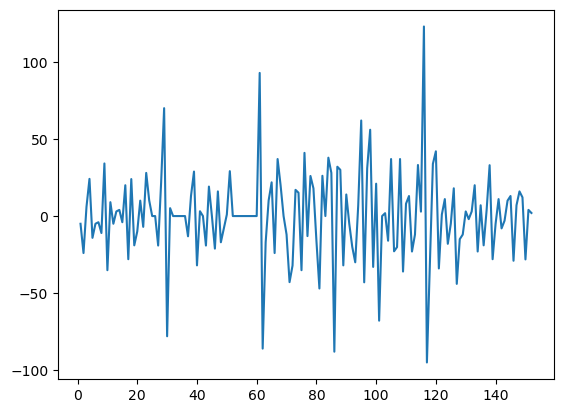

In [51]:
#1차 차분 데이터
import matplotlib.pyplot as plt
diff1=df['Ozone'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1=np.log(df['Ozone']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-9.189875590717376, 2.1375829081178104e-15, 3, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, 289.55299350103235)
ADF Statistic: -9.189876
p-value: 0.000000


In [54]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Ozone'],suppress_warnings=True)
model
#가장 적절한 모형은 arima(1,0,1)

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [55]:
#학습용,검증용 구분
n=int(df.shape[0]*.8)
train = df[:n]
test = df[n:]

In [56]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Ozone'], order=(1,0,1)).fit()
predictions = model.predict(start=1, end=len(test), dynamic=False)
predictions.index=len(train)+(predictions.index-1)

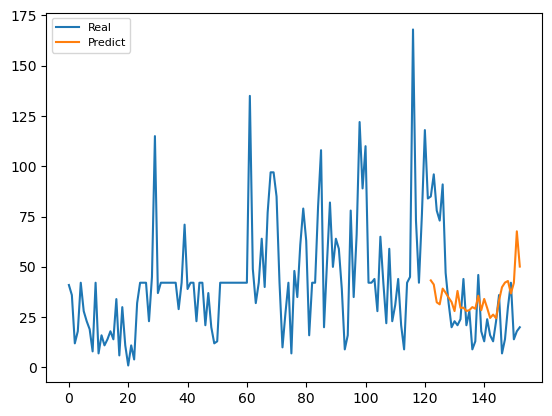

In [57]:
plt.plot(df['Ozone'],label='Real')
plt.plot(predictions,label='Predict')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [58]:
import numpy as np
def _error(real, pred):
    return real - pred
def mse(real, pred):
    return np.mean(np.square(_error(real, pred)))
def rmse(real, pred):
    return np.sqrt(mse(real, pred))
def mae(real, pred):
    return np.mean(np.abs(_error(real, pred)))

METRICS = {"mse": mse, "rmse": rmse, "mae": mae,}
def evaluate(real, pred, metrics=("mse", "rmse", "mae")):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](real, pred)
        except:
            results[name] = np.nan
    return results

In [59]:
evaluate(test['Ozone'].values, predictions.values)

{'mse': 644.8720675414185,
 'rmse': 25.394331405678287,
 'mae': 19.619085236543743}

> 비트코인 시세 예측

In [60]:
df = pd.read_csv('c:/vscode/data/coin/market-price.csv')

<AxesSubplot:>

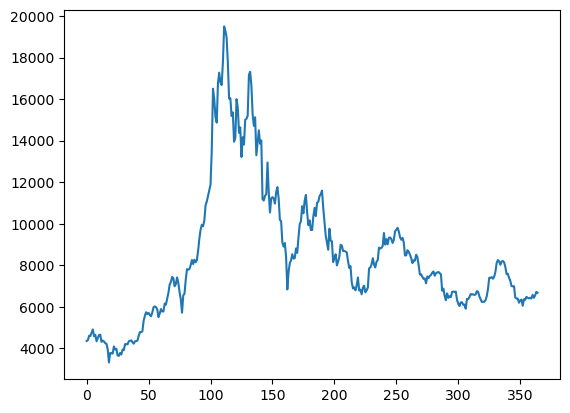

In [61]:
df['price'].plot()

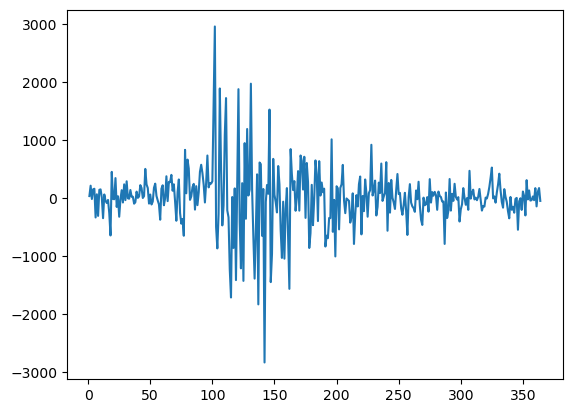

In [62]:
#1차 차분 데이터
import matplotlib.pyplot as plt
diff1=df['price'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [63]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1=np.log(df['price']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-7.390010724986963, 8.046990224984702e-11, 4, 359, {'1%': -3.4486972813047574, '5%': -2.8696246923288418, '10%': -2.571077032068342}, -1099.7979101893807)
ADF Statistic: -7.390011
p-value: 0.000000


In [64]:
from pmdarima.arima import auto_arima
model = auto_arima(df['price'],suppress_warnings=True)
model

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [65]:
#학습용,검증용 구분
n=int(df.shape[0]*.8)
train = df[:n]
test = df[n:]

In [66]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['price'], order=(0,1,0)).fit()
predictions = model.predict(start=1, end=len(test), dynamic=False)
predictions.index=len(train)+(predictions.index-1)

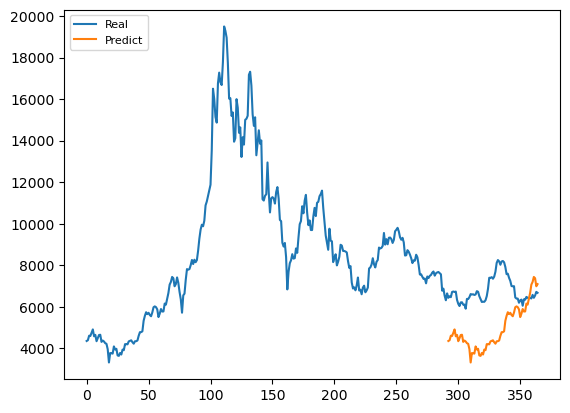

In [67]:
plt.plot(df['price'],label='Real')
plt.plot(predictions,label='Predict')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [68]:
import numpy as np
def _error(real, pred):
    return real - pred
def mse(real, pred):
    return np.mean(np.square(_error(real, pred)))
def rmse(real, pred):
    return np.sqrt(mse(real, pred))
def mae(real, pred):
    return np.mean(np.abs(_error(real, pred)))

METRICS = {"mse": mse, "rmse": rmse, "mae": mae,}
def evaluate(real, pred, metrics=("mse", "rmse", "mae")):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](real, pred)
        except:
            results[name] = np.nan
    return results

In [70]:
evaluate(test['price'].values, predictions.values)

{'mse': 4862708.949664892,
 'rmse': 2205.155085173125,
 'mae': 1934.3186223332834}

#### RNN (순환신경망)

> 사인곡선

In [73]:
import numpy as np
a=np.arange(0, 10, 0.5)
print(len(a),a) #0~10까지 0.5 간격으로 값 생성
data = np.sin(a)
print(data)
print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [74]:
#data=[1,2,3,4,5,6,7,8,9,10]
timestep = 3    # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측
X, y = [], []
for i in range(timestep, len(data)):
    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))
    y.append(data[i])
print(X)
print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [75]:
#신경망에 입력하기 위해 차원 변경
X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)
print(X.shape)
print(y.shape)

(17, 3, 1)
(17, 1)


In [76]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model=Sequential()

# units 출력노드수
model.add(SimpleRNN(units=10, input_shape=(3, 1)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')

In [80]:
from datetime import datetime  
import tensorflow as tf  
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir


'c:/logs/20230508-155040'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  
hist = model.fit(X, y, epochs=1000,callbacks=[tensorboard_callback])
#anaconda prompt에서 실행
#tensorboard --logdir=c:/logs/20230508-1550407

Epoch 1/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0016
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 10/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 11/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.0016
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 13/1000
1/1 [==================

In [ ]:
# history = model.fit(X, y, epochs=1000, verbose=1)

In [84]:
model.evaluate(X,y)

1/1 [==============================] - 0s 24ms/step - loss: 6.9884e-04


0.0006988391396589577

1/1 [==============================] - 0s 20ms/step


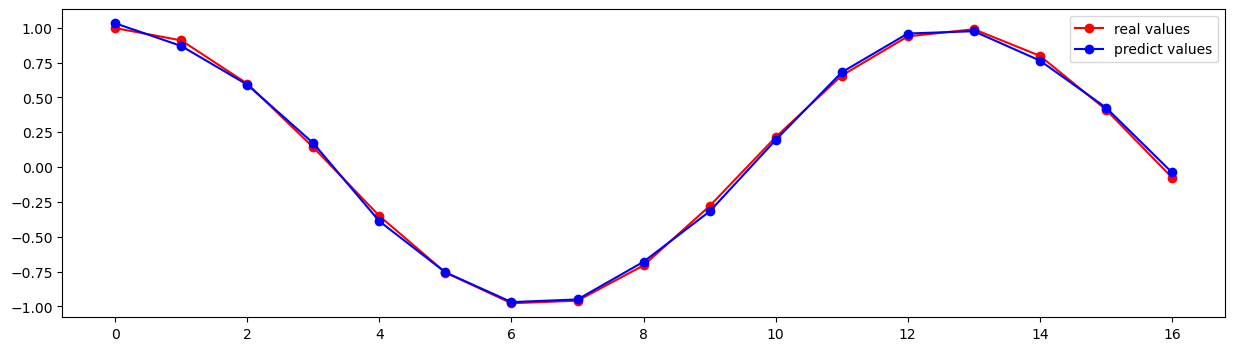

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 4))
# 실제값
plt.plot(data[3:], 'ro-', label='real values') 
#예측값
plt.plot(model.predict(X), 'bo-', label='predict values')
plt.legend()
plt.show()

> 주가예측

In [1]:
import pandas as pd
df = pd.read_csv('c:/vscode/data/time/data2.csv')

<AxesSubplot:xlabel='date'>

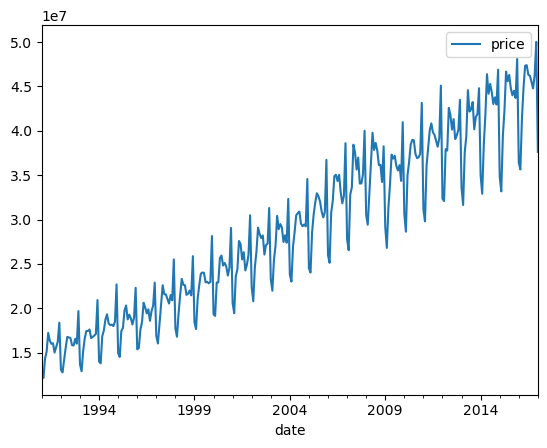

In [2]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.plot()

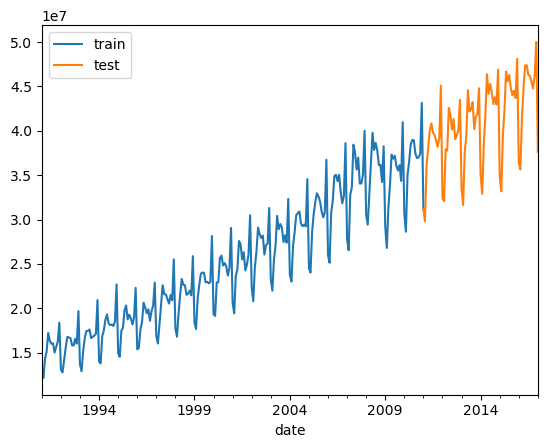

In [3]:
import matplotlib.pyplot as plt
split_date = pd.Timestamp('01-01-2011')

train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(train)
train_sc = sc.transform(train)
test_sc = sc.transform(test)

#넘파이배열을 데이터프레임으로 변환
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'],
                index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'],
                index=test.index)

In [6]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
train_sc_df.head(13)
#과거값 12개로 현재값을 예측하고자 함

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-01,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [7]:
#결측값 NaN 제거
#독립변수 : shift_1 ~ shift_12
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
#종속변수 : Scaled
y_train = train_sc_df.dropna()[['Scaled']]
X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

#넘파이배열로 저장
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

In [15]:
# 케라스에 필요한 3차원 형태로 변환
# RNN에는 시간 개념이 있기 때문에 차원이 추가됨
# [size,timestep,변수개수]
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

In [21]:
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, 변수개수)
# model.add(SimpleRNN(20, input_shape=(12, 1))) # (timestep, 변수개수)
model.add(Dense(1)) # 출력층의 노드 개수 1
#mean_squared_error 연속적인 값 예측
model.compile(loss='mse', optimizer='adam')
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
4/4 [==============================] - 1s 5ms/step - loss: 0.0621
Epoch 2/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0369
Epoch 3/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0175
Epoch 4/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 5/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 6/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0114
Epoch 7/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 8/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 9/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 10/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 11/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 12/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 13/250
4/4 [==============================] - 0s 6ms/st

In [22]:
score = model.evaluate(X_test_t, y_test, verbose=0)
print(score) #평균제곱오차
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.001789805362932384
2/2 [==============================] - 0s 4ms/step
[0.6475578  0.59665596 0.7892613  0.84960914 0.91364473 0.94043547
 0.91172016 0.9030151  0.8809054  0.8615677 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [23]:
import numpy as np
#실제값-예측값의 평균값
np.mean(y_test - y_pred)

0.028710051839636846

In [24]:
y_predicted = sc.inverse_transform(y_pred)
y_tested = sc.inverse_transform(y_test)
np.mean(y_tested - y_predicted)

889828.524590164

2/2 [==============================] - 0s 3ms/step


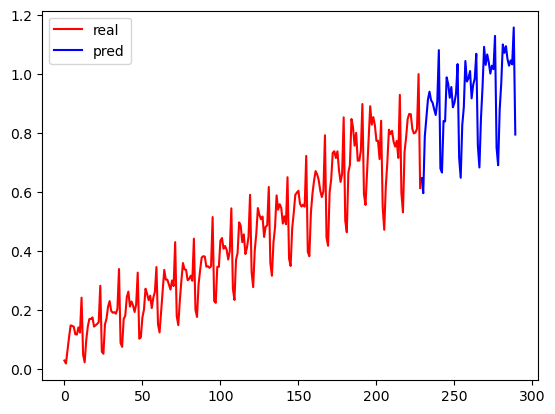

In [25]:
import matplotlib.pyplot as plt

pred=model.predict(X_test_t)
a=np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))
b=np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))

plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()

> 대기오염

In [69]:
df = pd.read_csv('c:/vscode/data/pollution.csv', index_col=0)

<AxesSubplot:>

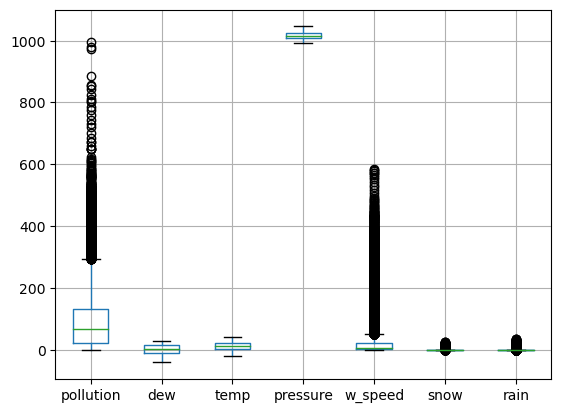

In [27]:
df.boxplot()

In [70]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

values = df.values
encoder = LabelEncoder()
# w_dr 변수 정수인코딩
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
np.unique(values[:,4])

array([0., 1., 2., 3.], dtype=float32)

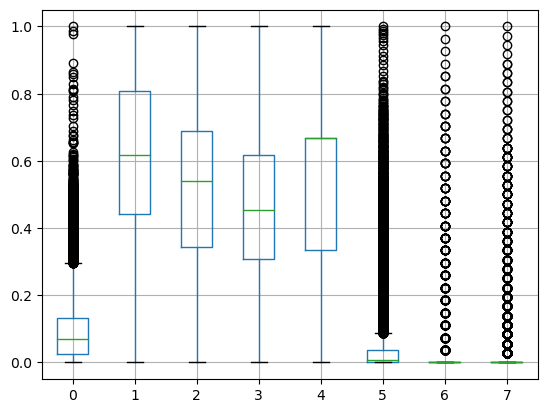

In [71]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
pd.DataFrame(scaled).boxplot()
plt.show()

In [72]:
#쉬프트
def shift(train):
    timestep = 4
    X = []
    y = []
    for i in range(timestep, len(train)):
        X.append(train[i-timestep:i,:]) # pollution ~ rain
        y.append(train[i,0:1]) # pollution
    return X,y

In [73]:
X, y = shift(scaled)
X = np.array(X)
y = np.array(y)

#학습용:검증용 8:2 (4년:1년)
n_train= int(len(X)*.2)+1
X_train, X_test = X[n_train:,] , X[:n_train,]
print(X_train.shape, X_test.shape)
y_train, y_test = y[n_train:,] , y[:n_train,]

(35036, 4, 8) (8760, 4, 8)


In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

model = Sequential()
#return_sequences = False 기본값, 마지막 스텝만 내보내는 옵션
#return_sequences = True, 모든 스텝에 내보내는 옵션(LSTM을 여러층으로 만들 경우 사용)
model.add(LSTM(units = 50, return_sequences = True,
        input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 4, 50)             11800     
                                                                 
 dropout_3 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_8 (LSTM)               (None, 4, 50)             20200     
                                                                 
 dropout_4 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [33]:
model.fit(X_train, y_train, validation_split=0.2, epochs = 10,
batch_size = 32)

Epoch 1/10
876/876 [==============================] - 12s 10ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 2/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0013 - val_loss: 5.6475e-04
Epoch 3/10
876/876 [==============================] - 8s 9ms/step - loss: 9.8733e-04 - val_loss: 5.7419e-04
Epoch 4/10
876/876 [==============================] - 8s 9ms/step - loss: 9.5952e-04 - val_loss: 5.3610e-04
Epoch 5/10
876/876 [==============================] - 8s 9ms/step - loss: 9.1761e-04 - val_loss: 5.0841e-04
Epoch 6/10
876/876 [==============================] - 7s 9ms/step - loss: 8.9157e-04 - val_loss: 5.0696e-04
Epoch 7/10
876/876 [==============================] - 8s 9ms/step - loss: 8.8668e-04 - val_loss: 5.1007e-04
Epoch 8/10
876/876 [==============================] - 7s 9ms/step - loss: 8.9142e-04 - val_loss: 5.0750e-04
Epoch 9/10
876/876 [==============================] - 7s 9ms/step - loss: 8.5788e-04 - val_loss: 5.3474e-04
Epoch 10/10
876/876 [=================

In [34]:
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

274/274 [==============================] - 2s 3ms/step


0.029928112

In [35]:
d = scaled[:n_train,:]
y_predicted = np.concatenate((pred,d[:n_train,1:]), axis =1)
y_tested = np.concatenate((y_test, d[:n_train,1:]), axis = 1)

y_predicted = scaler.inverse_transform(y_predicted)
y_tested = scaler.inverse_transform(y_tested)
y_predicted = y_predicted[:,0:1]
y_tested = y_tested[:,0:1]

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tested, y_predicted)
rmse = np.sqrt(mse)
rmse

29.748543

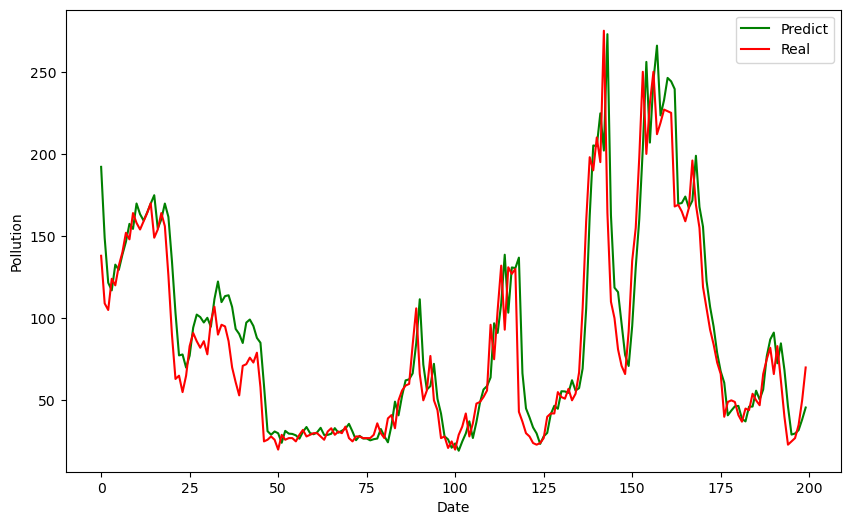

In [39]:
plt.figure(figsize=(10,6))
plt.plot(y_predicted[:200,:], color= 'g',label = 'Predict')
plt.plot(y_tested[:200,:] , color = 'r',label = 'Real')
plt.xlabel("Date")
plt.ylabel("Pollution")
plt.legend()
plt.show()

> 승객수 예측

In [75]:
df = pd.read_csv('c:/vscode/data/passengers.csv', index_col='Month')

<AxesSubplot:xlabel='Month'>

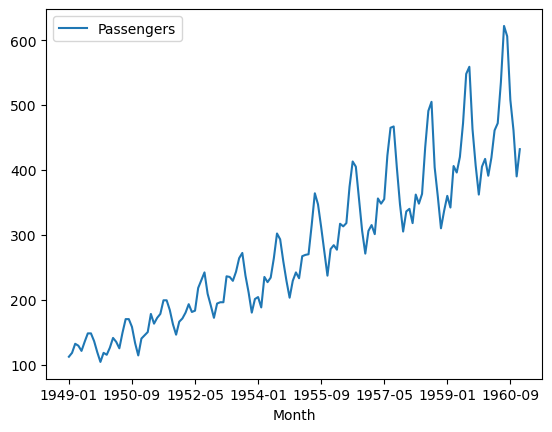

In [41]:
df.plot()

In [76]:
df = df[['Passengers']]
df.index.names = ['Month']
df.sort_index(inplace=True)

dataset = df.astype('float32')

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataset)

train_size = int(len(scaled) * 0.8)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]


In [78]:
def create_dataset(dataset, timestep):
    print(len(dataset), timestep)
    dataX, dataY = [], []
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep), 0]
        dataset[i + timestep, 0]
        dataX.append(a)
        dataY.append(dataset[i + timestep, 0])
    return np.array(dataX), np.array(dataY)

In [115]:
timestep = 3
X_train, y_train = create_dataset(train, timestep)
X_test, y_test = create_dataset(test, timestep)

115 3
29 3


In [116]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [117]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model=Sequential()
model.add(SimpleRNN(units=20,input_shape=(timestep,1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 20)                440       
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 9ms/step - loss: 0.0736
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0450
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0307
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0237
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0208
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0192
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0173
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0152
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0146
Epoch 13/100
4/4 [==============================] - 0s 6ms/s

In [119]:
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

trainScore = np.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print(trainScore)
testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print(testScore)

1/1 [==============================] - 0s 19ms/step
38.04956063687656
87.6171630202571


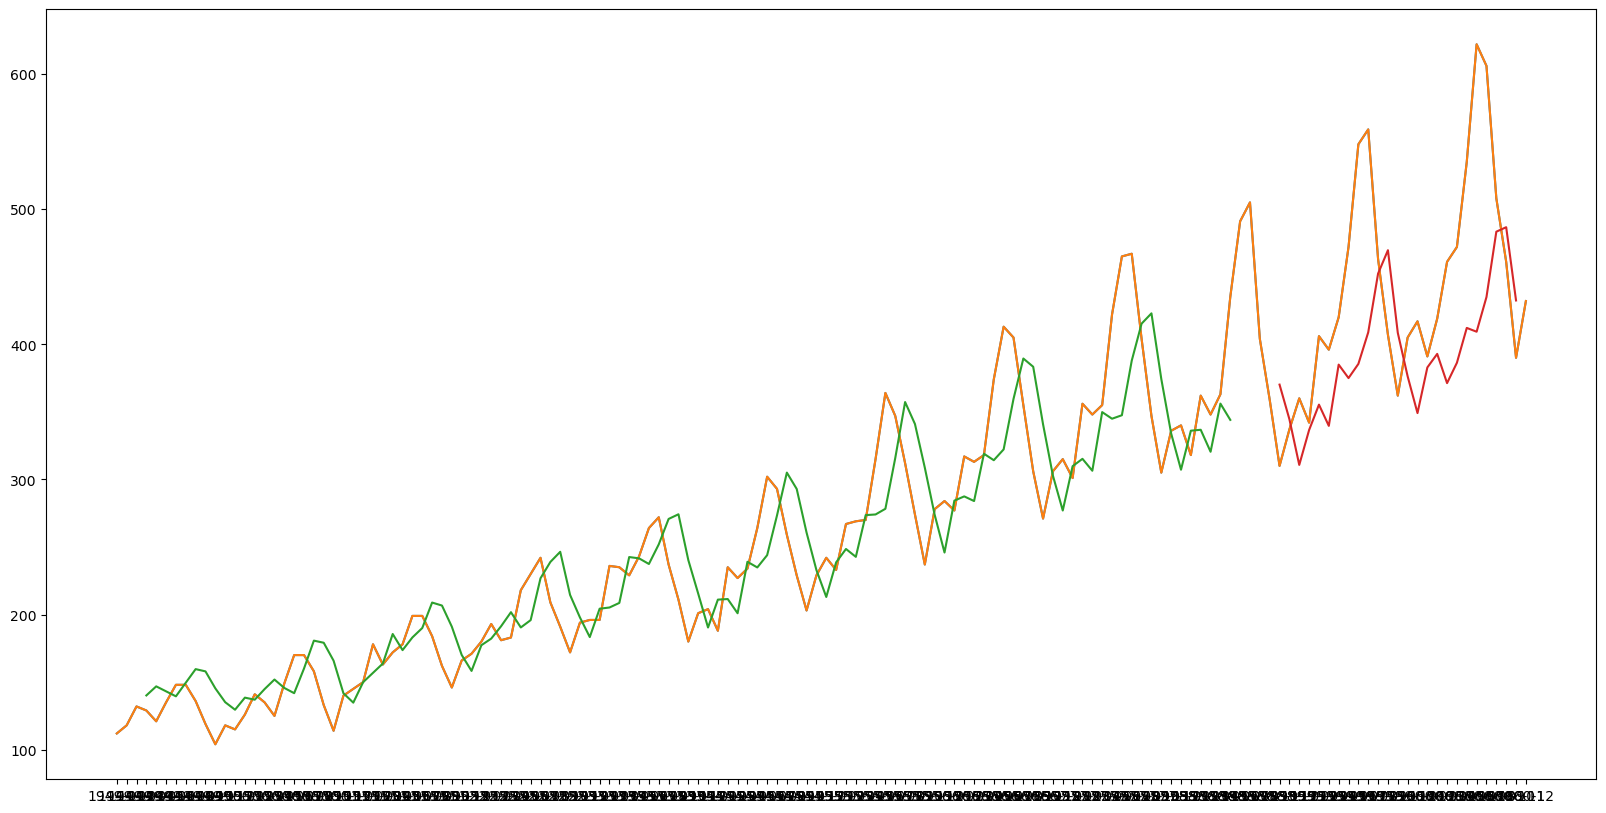

In [120]:
from matplotlib import pyplot as plt

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestep:len(trainPredict)+timestep, :] = trainPredict
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestep*2)+1:len(scaled)-1, :] = testPredict

plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

> 시계열모형의 성능 평가

In [121]:
import warnings
warnings.filterwarnings("ignore")

In [123]:
air_pollution = pd.read_csv('c:/vscode/data/air_pollution.csv', parse_dates=['date'])
air_pollution.set_index('date', inplace=True)

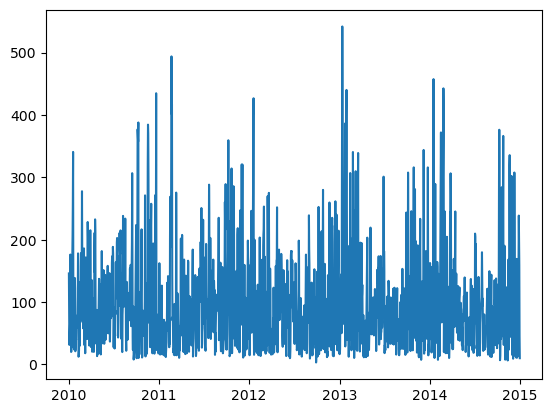

In [124]:
from matplotlib import pyplot as plt
plt.plot(air_pollution.pollution_today)
plt.show()

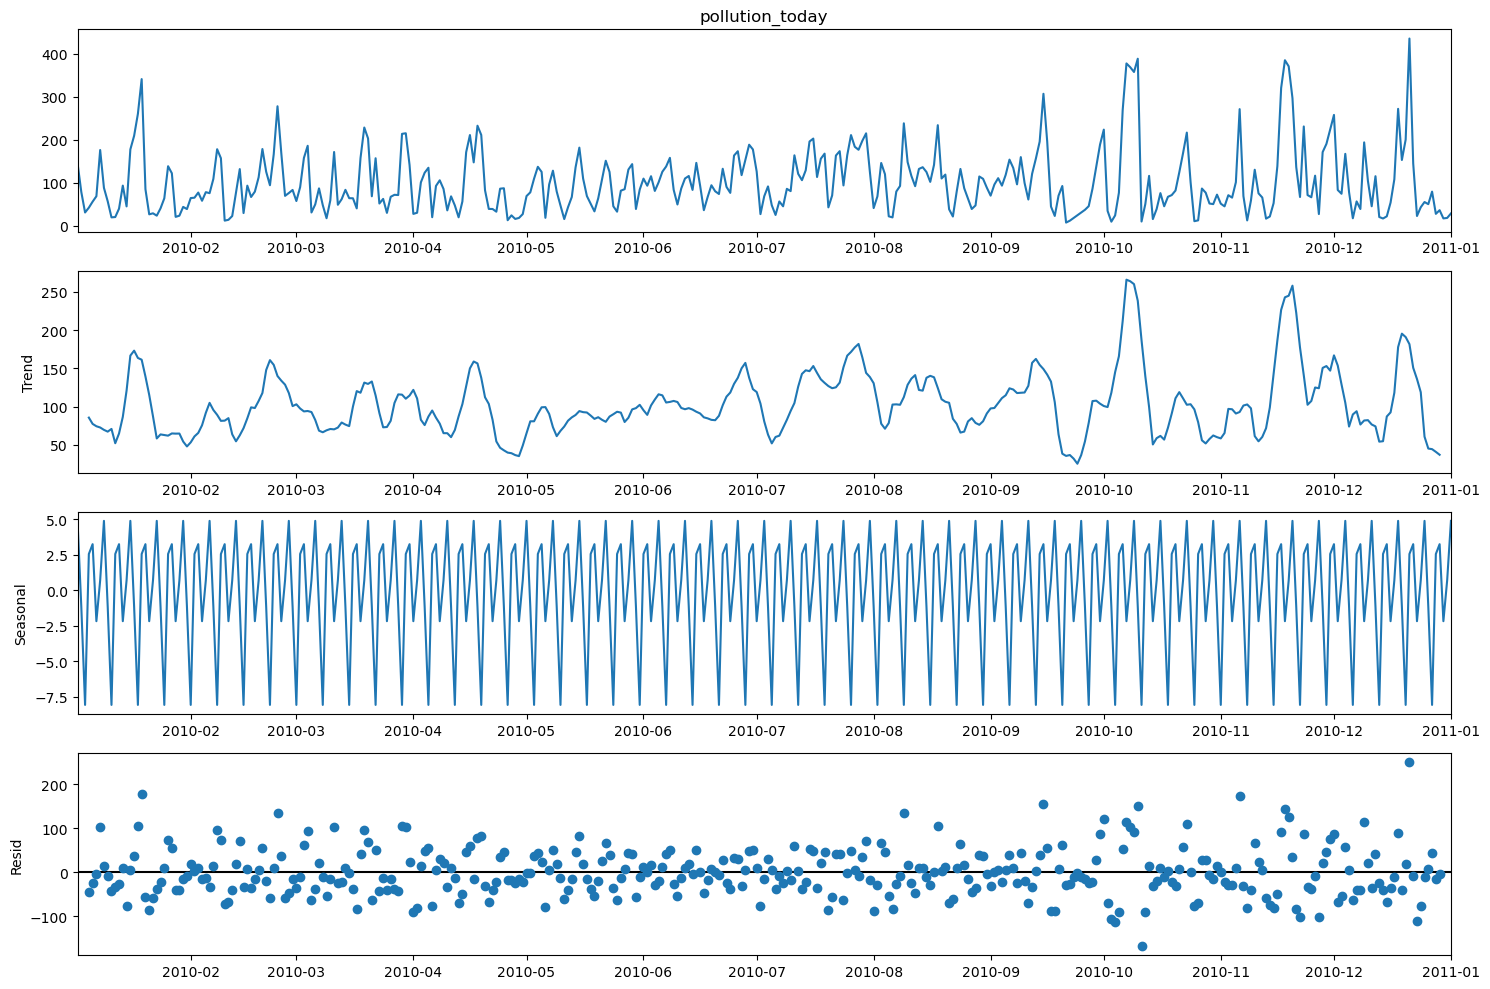

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

series = air_pollution.pollution_today[:365] #처음 1년간의 자료
result = seasonal_decompose(series) #시계열 성분 분해
rcParams['figure.figsize'] = 15, 10
result.plot()
plt.show()

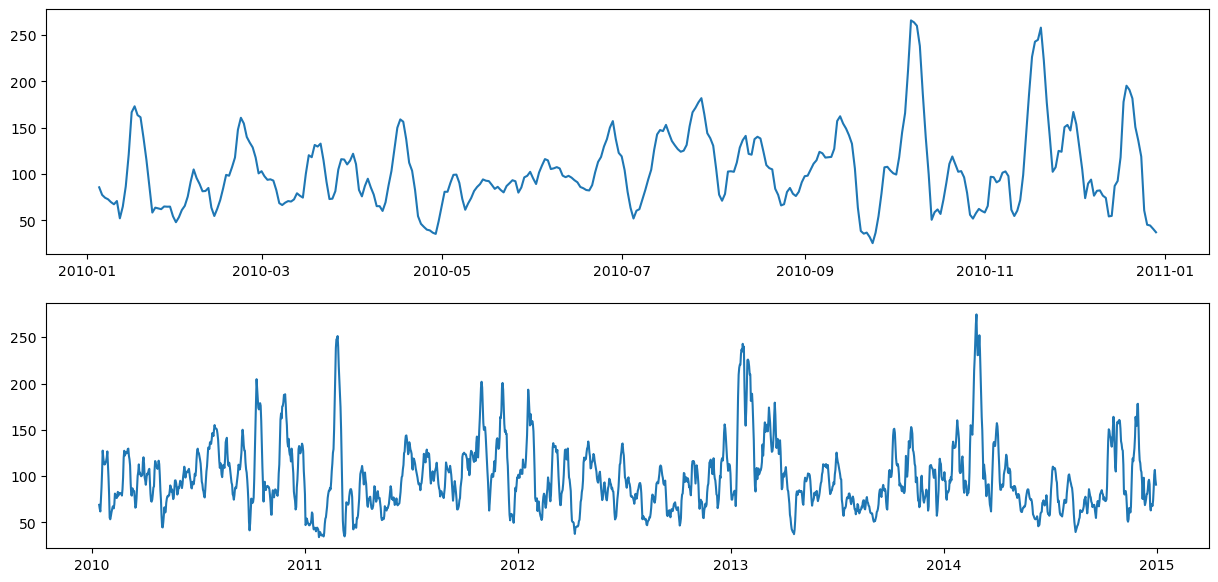

In [126]:
fig = plt.figure(figsize=(15, 7))
layout = (2, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
pm_ax.plot(result.trend) #전체 기간
mm = air_pollution.pollution_today.rolling(12).mean() #이동평균(12일간)
mv_ax.plot(mm)

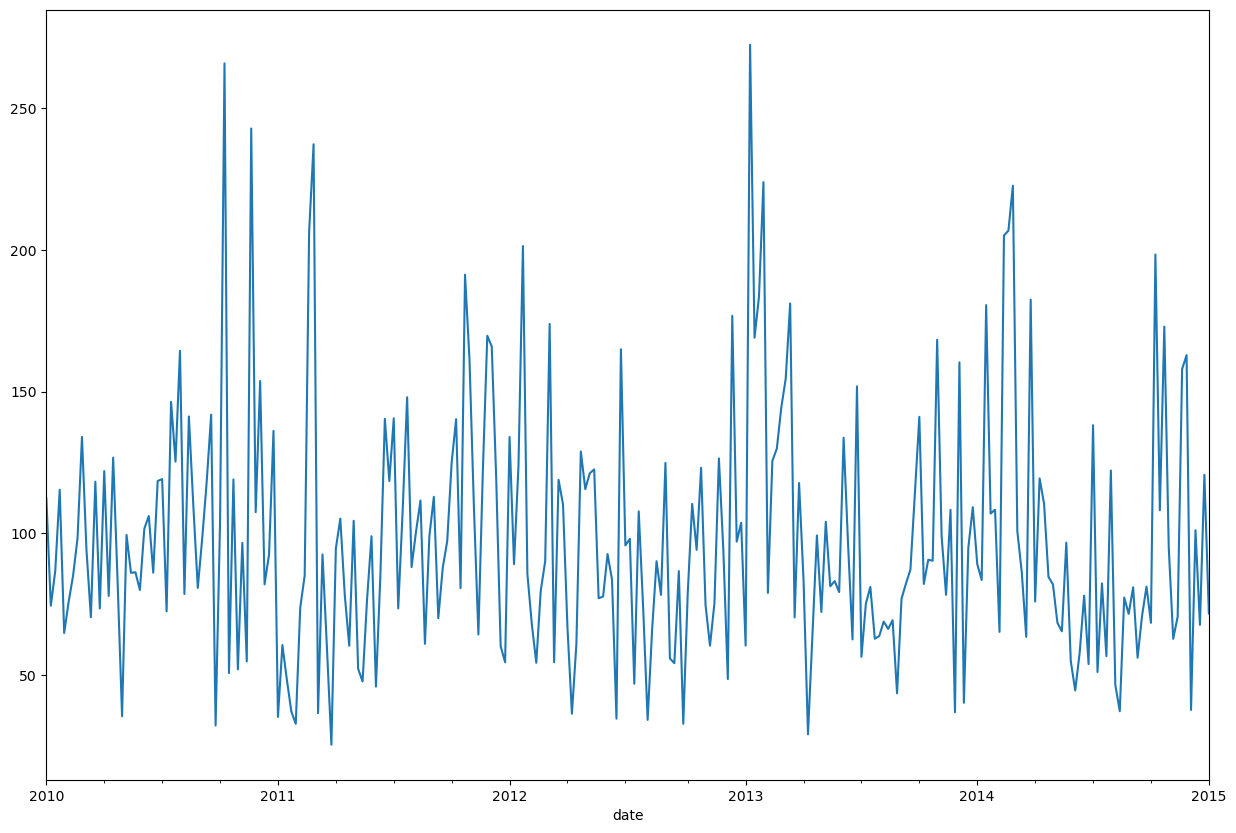

In [127]:
resample = air_pollution.resample('W') #시계열데이터를 주단위로 리샘플링
weekly_mean = resample.mean()
weekly_mean.pollution_today.plot()
plt.show()

In [128]:
from statsmodels.tsa.stattools import adfuller
X = air_pollution.pollution_today.values
result = adfuller(X)
print('p-value: %f' % result[1])

p-value: 0.000000


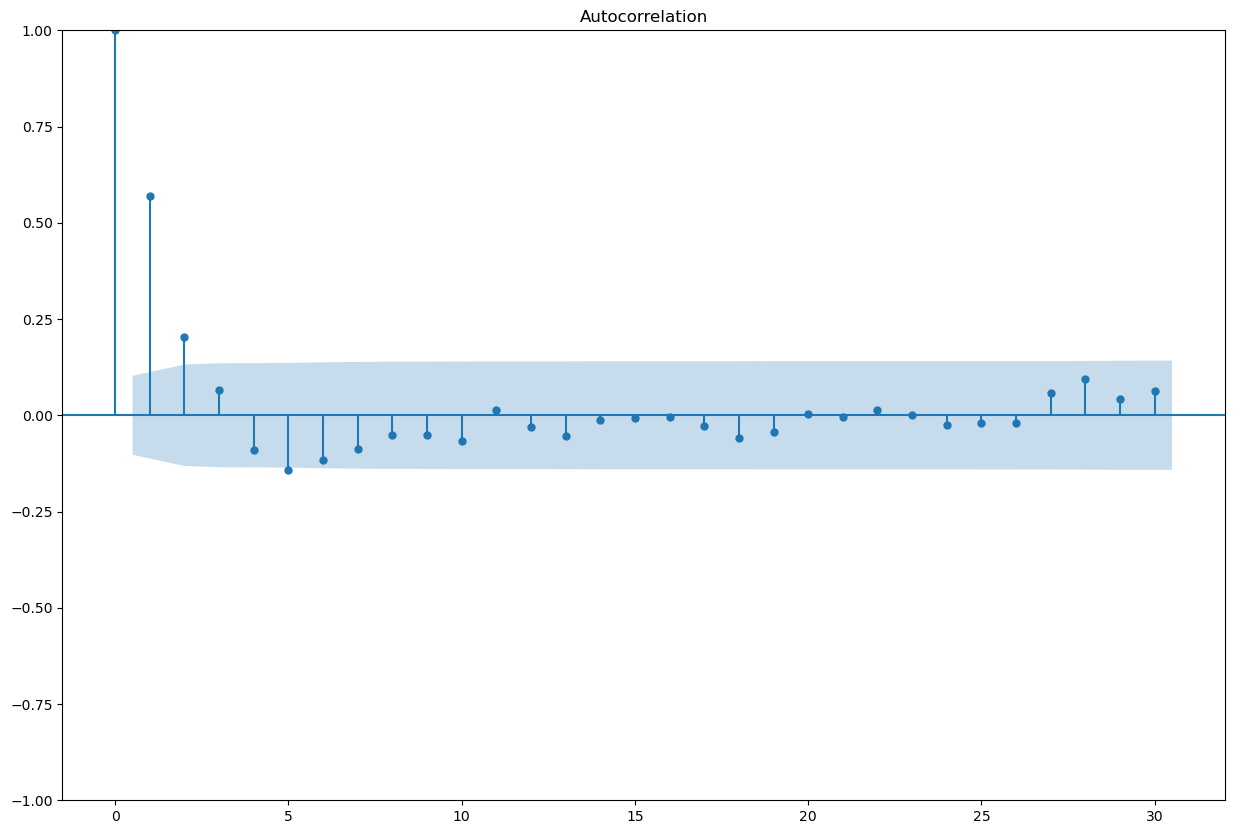

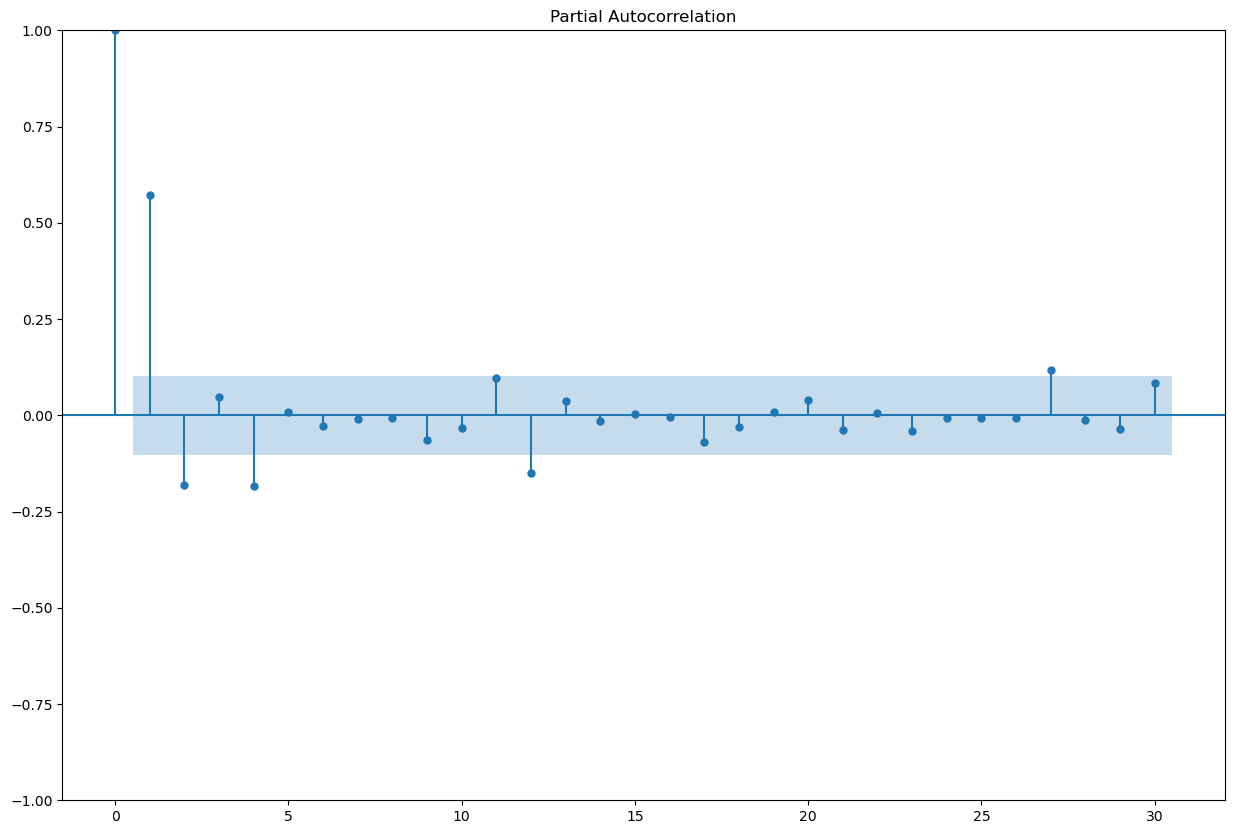

In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# acf와 pacf를 통해 적합한 arima 모형 결정
# acf(자기상관함수), pacf(부분자기상관함수) , lag 시차
# lag 0 시점은 읽지 않음
# lag 3부터 점선 안에 존재함 lag 절단값은 3 => MA(2)
plot_acf(series, lags=30)
plot_pacf(series, lags=30)
# 절단값이 명확하지 않아 AR 모형 확정이 어려운 상태
plt.show()

In [130]:
resultsDict = {}
predictionsDict = {}
split_date = '2014-01-01'
df_training = air_pollution.loc[air_pollution.index <= split_date]
df_test = air_pollution.loc[air_pollution.index > split_date]

In [158]:
import pmdarima as pm
autoModel = pm.auto_arima(df_training.pollution_today,
                        error_action='ignore',
                        suppress_warnings=True, seasonal=False)
autoModel.fit(df_training.pollution_today)

ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True)

In [131]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_training.pollution_today, order=(0,0,3)).fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [132]:
import numpy as np
from sklearn.metrics import r2_score

def _error(real, pred):
    return real - pred
def mse(real, pred):
    return np.mean(np.square(_error(real, pred)))
def rmse(real, pred):
    return np.sqrt(mse(real, pred))
def mae(real, pred):
    return np.mean(np.abs(_error(real, pred)))

METRICS = {
    "mse": mse,
    "rmse": rmse,
    "mae": mae,
    "r2": r2_score,
    }

def evaluate(real, pred, metrics=("mse", "rmse", "mae", "r2")):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](real, pred)
        except:
            results[name] = np.nan
    return results

In [133]:
from tqdm import tqdm

index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_pollution[:len(df_training)+t]
    model = ARIMA(temp_train.pollution_today, order=(0, 0, 3))
    model_fit = model.fit()
    predictions = model_fit.predict(
                start=len(temp_train), end=len(temp_train),
                dynamic=False)
    yhat = yhat + [predictions]
yhat = pd.concat(yhat)
resultsDict['ARIMA'] = evaluate(df_test.pollution_today, yhat.values)
predictionsDict['ARIMA'] = yhat.values

  0%|          | 0/364 [00:00<?, ?it/s]c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
  0%|          | 1/364 [00:00<00:56,  6.47it/s]c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequen

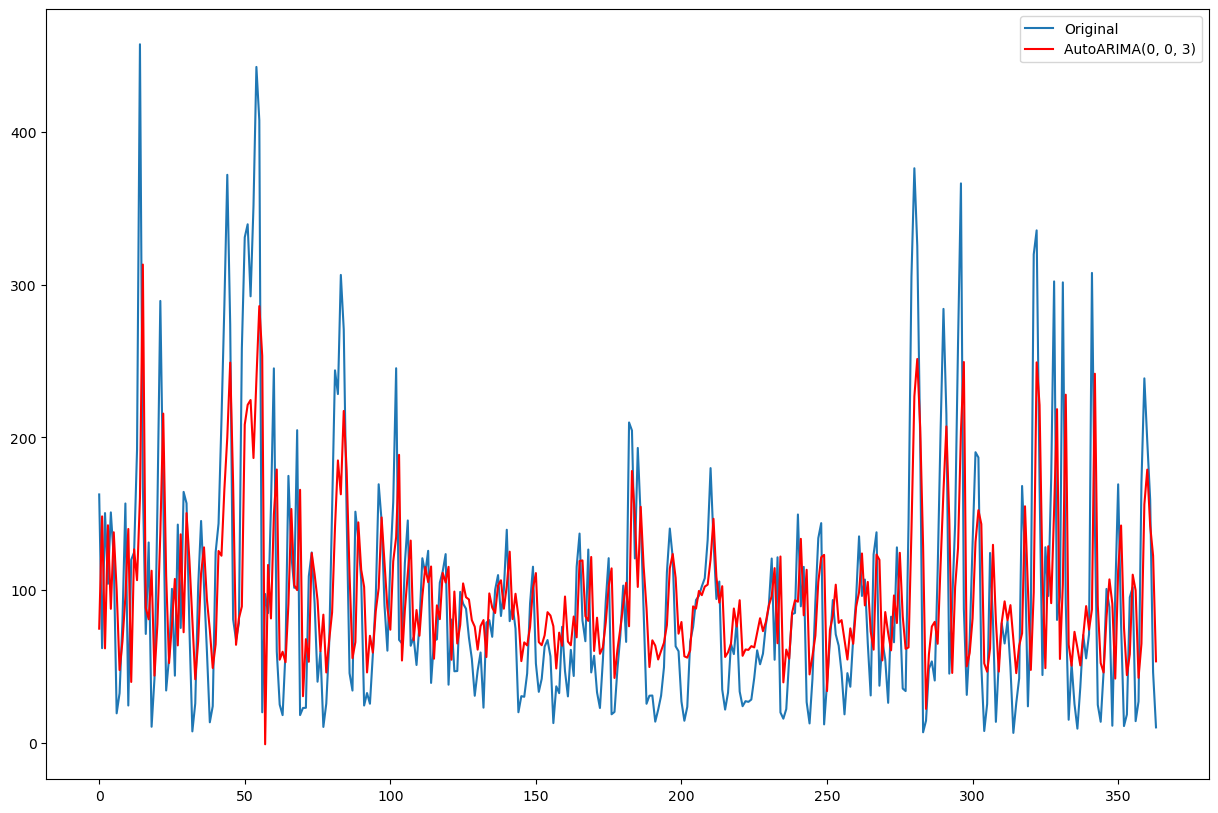

In [134]:
order = autoModel.order
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='AutoARIMA{0}'.format(order))
plt.legend()
plt.show()

In [135]:
def create_time_features(df, target=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y
    return X

In [136]:
from sklearn.preprocessing import StandardScaler
X_train_df, y_train = create_time_features(
df_training, target='pollution_today')
X_test_df, y_test = create_time_features(df_test,
target='pollution_today')
scaler = StandardScaler()
scaler.fit(X_train_df)
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)
X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [137]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['LinearRegression'] = evaluate(df_test.pollution_today, yhat)
predictionsDict['LinearRegression'] = yhat

In [138]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['RF'] = evaluate(df_test.pollution_today, yhat)
predictionsDict['RF'] = yhat

In [139]:
from xgboost import XGBRegressor
reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,verbose=False)
yhat = reg.predict(X_test)
resultsDict['XGBoost'] = evaluate(df_test.pollution_today, yhat)
predictionsDict['XGBoost'] = yhat

In [142]:
from lightgbm import LGBMRegressor
lightGBM = LGBMRegressor()
lightGBM.fit(X_train, y_train)
yhat = lightGBM.predict(X_test)
resultsDict['Lightgbm'] = evaluate(df_test.pollution_today, yhat)
predictionsDict['Lightgbm'] = yhat

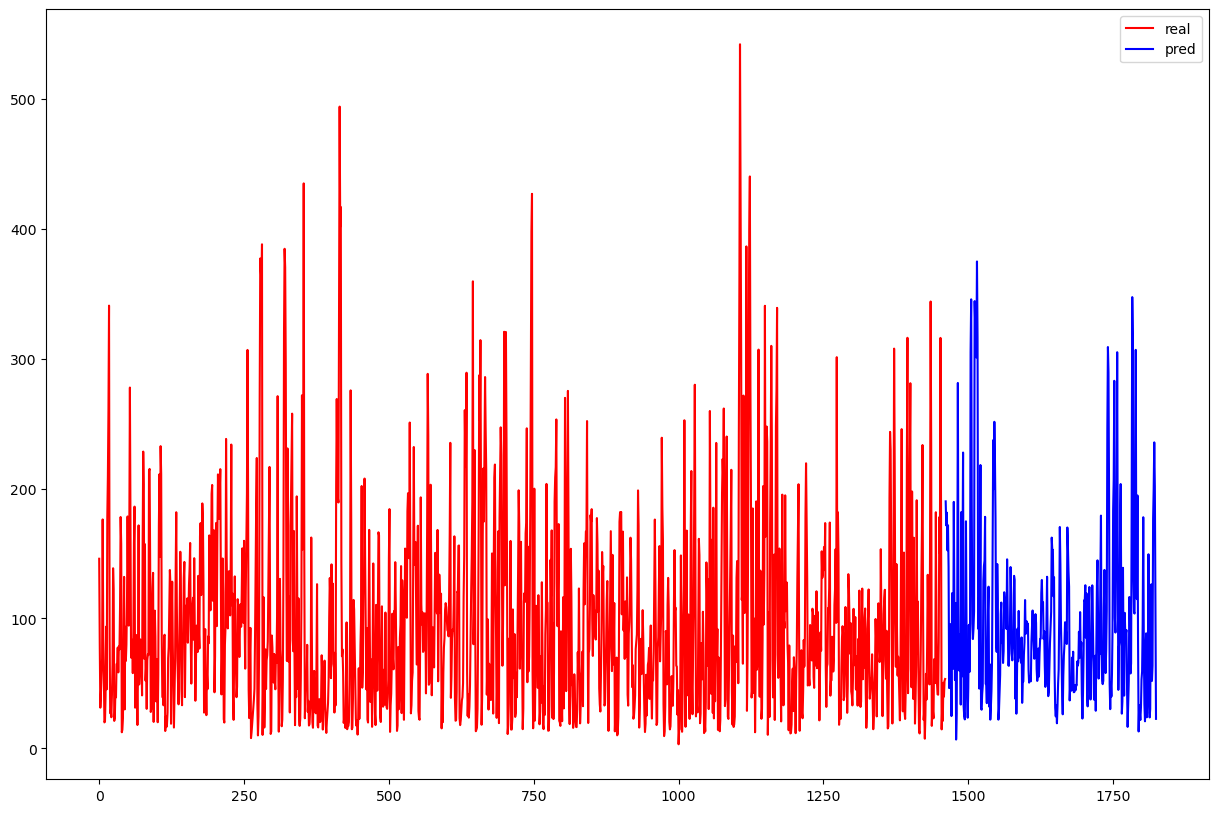

In [143]:
# LGBM 점수가 제일 잘 나와서 이거로만 해봄
a=np.concatenate((df_training.pollution_today.values, np.zeros(len(X_train))+np.nan))
b=np.concatenate((np.zeros(len(X_train))+np.nan, yhat))
plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()

In [144]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf', C=100, gamma=0.01)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['SVM'] = evaluate(df_test.pollution_today, yhat)
predictionsDict['SVM'] = yhat

In [145]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['KNN'] = evaluate(df_test.pollution_today, yhat)
predictionsDict['KNN'] = yhat

In [146]:
import tensorflow as tf

tf.random.set_seed(0)
BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24

#타임스텝 7로 설정
def window_data(X, Y, window=7):
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)

X_w = np.concatenate((X_train, X_test))
y_w = np.concatenate((y_train, y_test))
X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_test)]
y_train_w = y_w[:-len(X_test)]
X_test_w = X_w[-len(X_test):]
y_test_w = y_w[-len(X_test):]
train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

dropout = 0.0
lstm_model = Sequential([
                LSTM(128, input_shape=X_train_w.shape[-2:], dropout=dropout),
                Dense(128),
                Dense(128),
                Dense(1)
            ])
lstm_model.compile(optimizer='rmsprop', loss='mae')
lstm_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 128)               74752     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 107,905
Trainable params: 107,905
Non-trainable params: 0
_________________________________________________________________


In [148]:
model_history = lstm_model.fit(train_data, epochs=10,
                steps_per_epoch=200,
                validation_data=val_data,
                validation_steps=50)

Epoch 1/10
200/200 [==============================] - 4s 10ms/step - loss: 52.5313 - val_loss: 43.9179
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 35.6616 - val_loss: 33.5643
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 29.4714 - val_loss: 30.4228
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 26.3434 - val_loss: 32.5322
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 24.0137 - val_loss: 30.6055
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 21.7569 - val_loss: 28.0925
Epoch 7/10
200/200 [==============================] - 1s 7ms/step - loss: 19.2495 - val_loss: 33.8082
Epoch 8/10
200/200 [==============================] - 1s 7ms/step - loss: 17.5134 - val_loss: 30.2691
Epoch 9/10
200/200 [==============================] - 1s 7ms/step - loss: 15.5373 - val_loss: 31.1577
Epoch 10/10
200/200 [==============================] - 1s 7ms/step - loss: 14.235

In [149]:
yhat = lstm_model.predict(X_test_w).reshape(1, -1)[0]
resultsDict['LSTM'] = evaluate(y_test, yhat)
predictionsDict['LSTM'] = yhat

12/12 [==============================] - 0s 9ms/step


In [150]:
def bar_metrics(resultsDict):
    df = pd.DataFrame.from_dict(resultsDict)
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    pallette = plt.cm.get_cmap("tab20c", len(df.columns))
    colors = [pallette(x) for x in range(len(df.columns))]
    color_dict = dict(zip(df.columns, colors))
    fig = plt.figure(figsize=(20, 15))
    fields=['mae','mse','rmse','r2']
    for idx,field in enumerate(fields):
        fig.add_subplot(2, 2, idx+1)
        plt.title(field.upper())
        df.loc[field].sort_values().plot(
                    kind="bar",
                    colormap="Paired",
                    color=[color_dict.get(x, "#333333") for x in
                    df.loc[field].sort_values().index],
        )
        plt.legend()
    plt.tight_layout()
    plt.show()

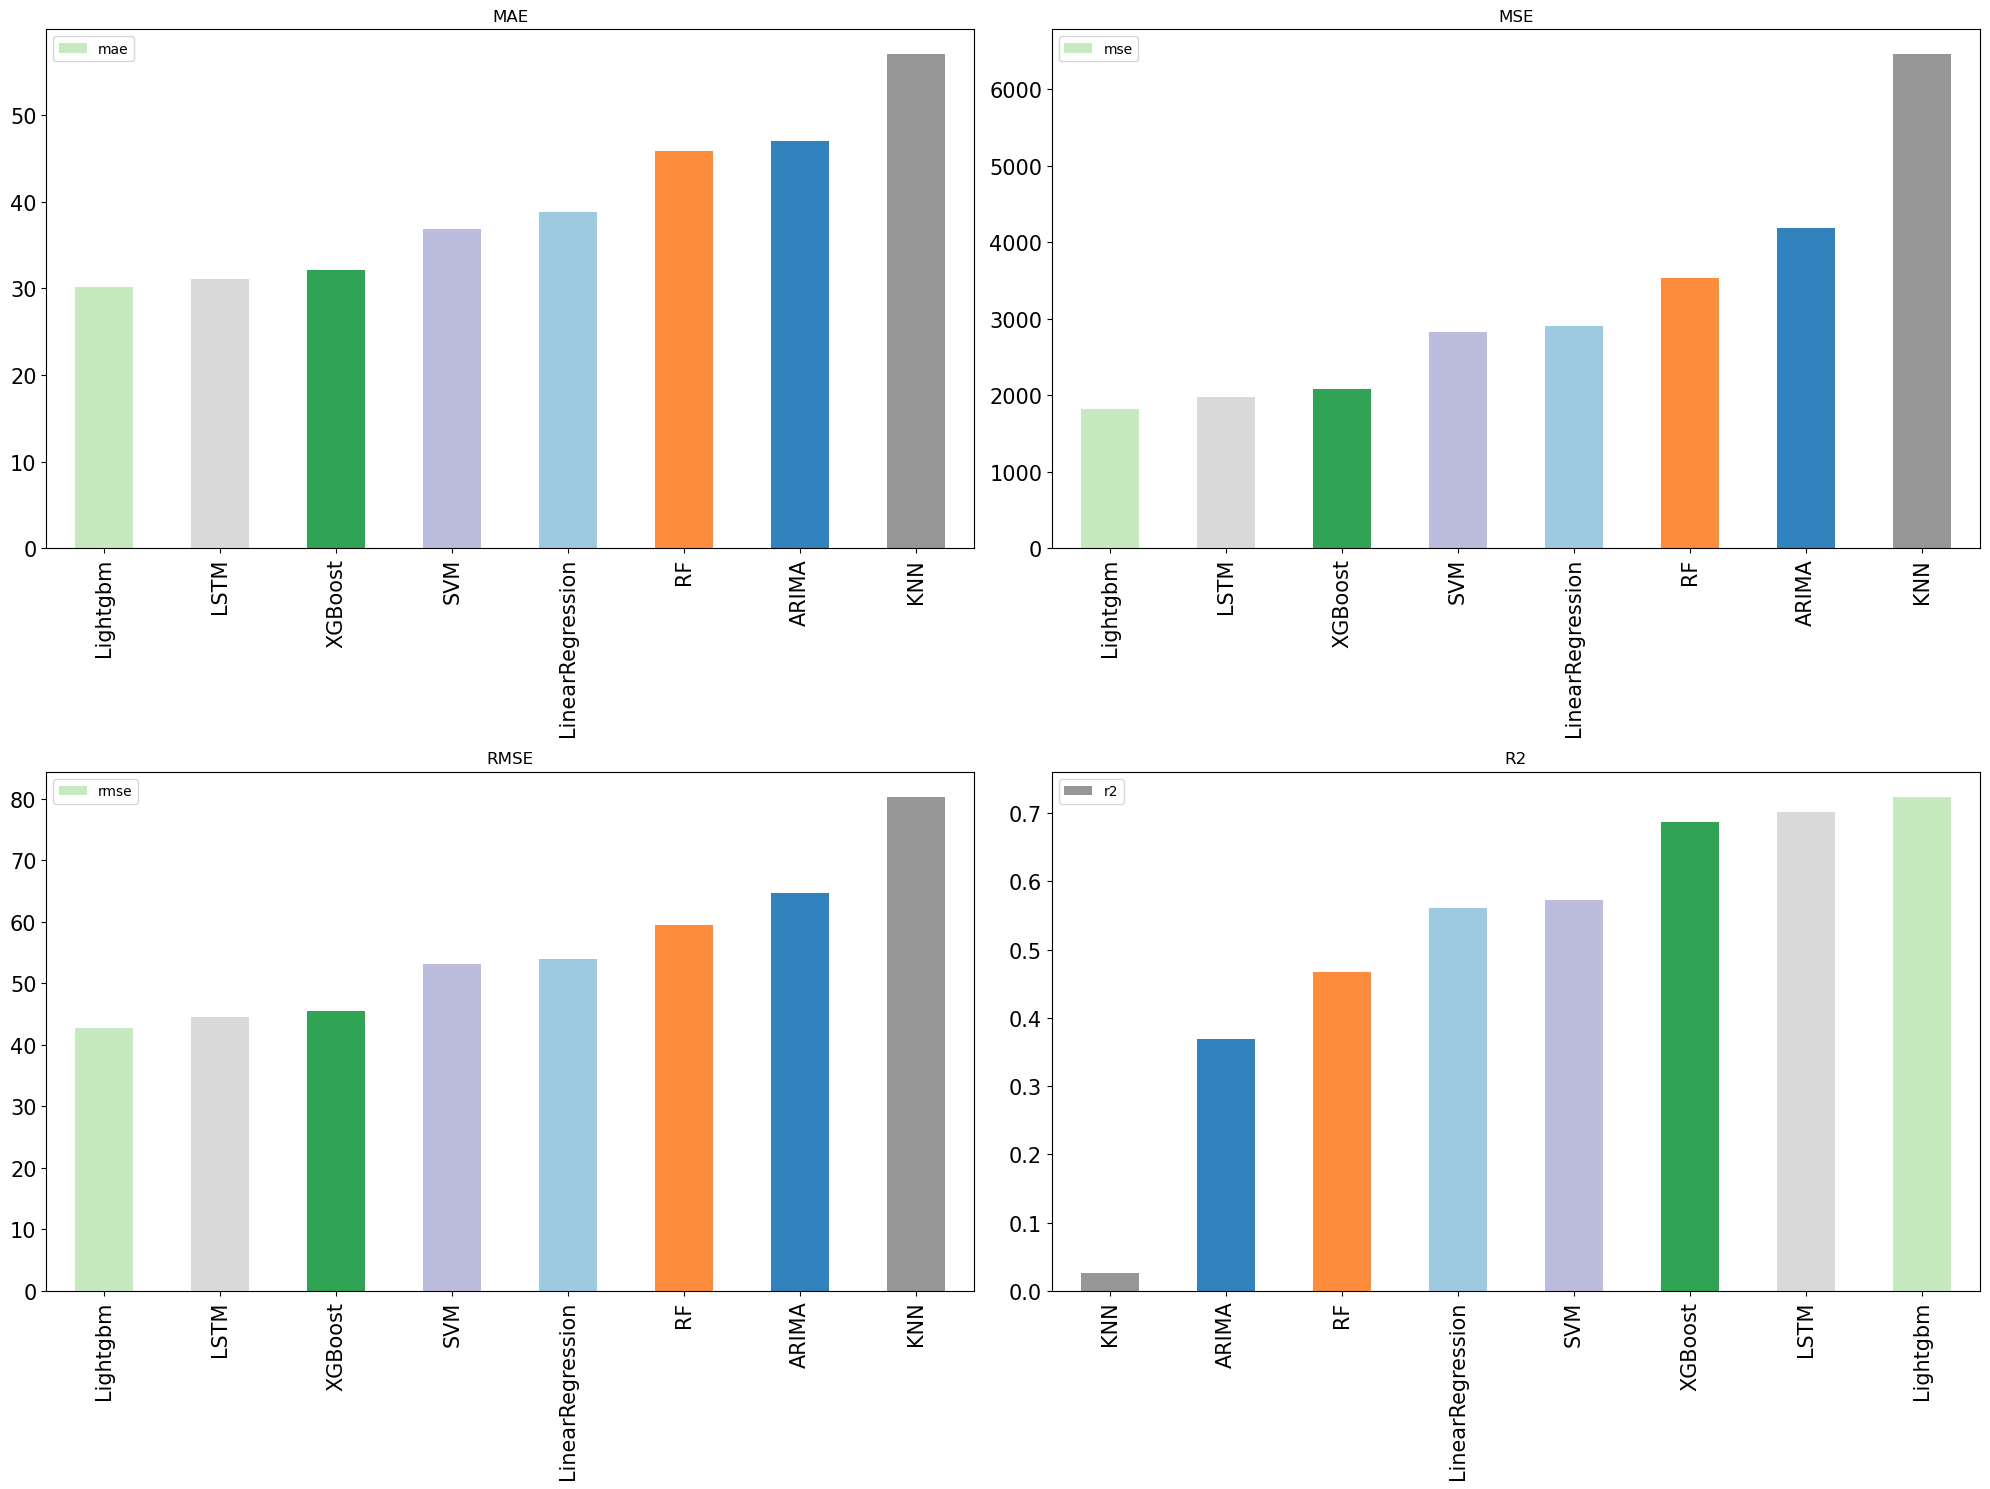

In [151]:
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
bar_metrics(resultsDict)

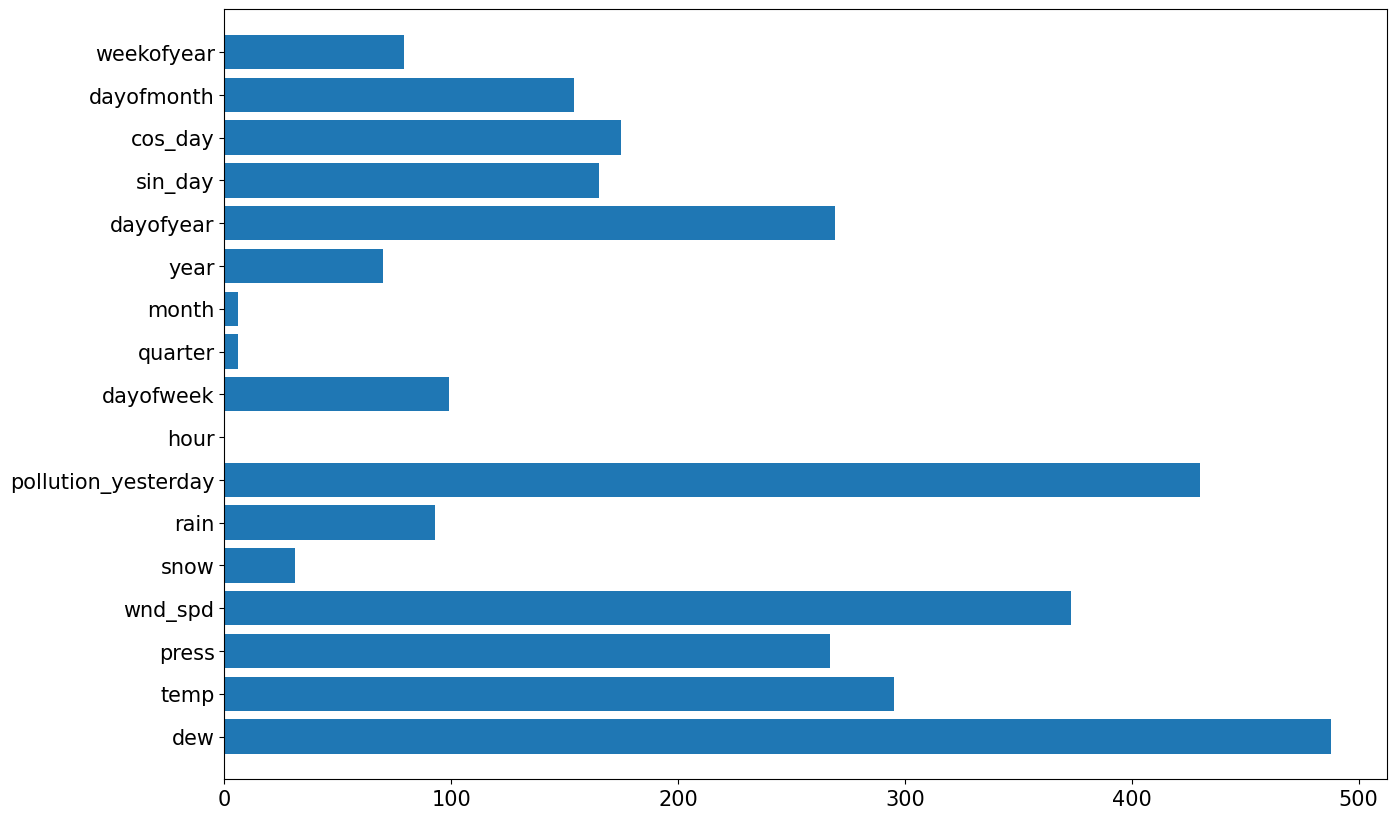

In [152]:
def plot_tree(model):
    n_features = X_train_df.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_df.columns)
    plt.ylim(-1, n_features)
#특성 중요도
plot_tree(lightGBM)

In [159]:
df = pd.DataFrame.from_dict(resultsDict).transpose().iloc[::-1]
df = df.round(2)
df

,mse,rmse,mae,r2
LSTM,1977.92,44.47,31.04,0.70
KNN,6462.12,80.39,57.05,0.03
SVM,2830.18,53.20,36.85,0.57
Lightgbm,1828.21,42.76,30.21,0.72
XGBoost,2078.24,45.59,32.13,0.69
RF,3534.18,59.45,45.84,0.47
LinearRegression,2909.35,53.94,38.79,0.56
ARIMA,4187.78,64.71,47.01,0.37


<BarContainer object of 8 artists>

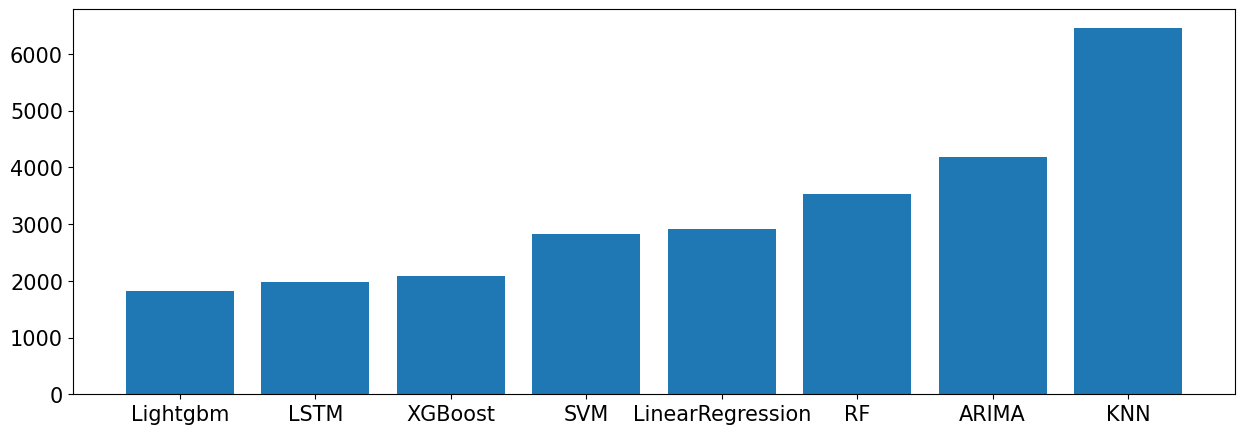

In [154]:
rcParams['figure.figsize'] = 15, 5
df_mse=df.sort_values(by='mse')
plt.bar(df_mse.index, df_mse.mse)

<BarContainer object of 8 artists>

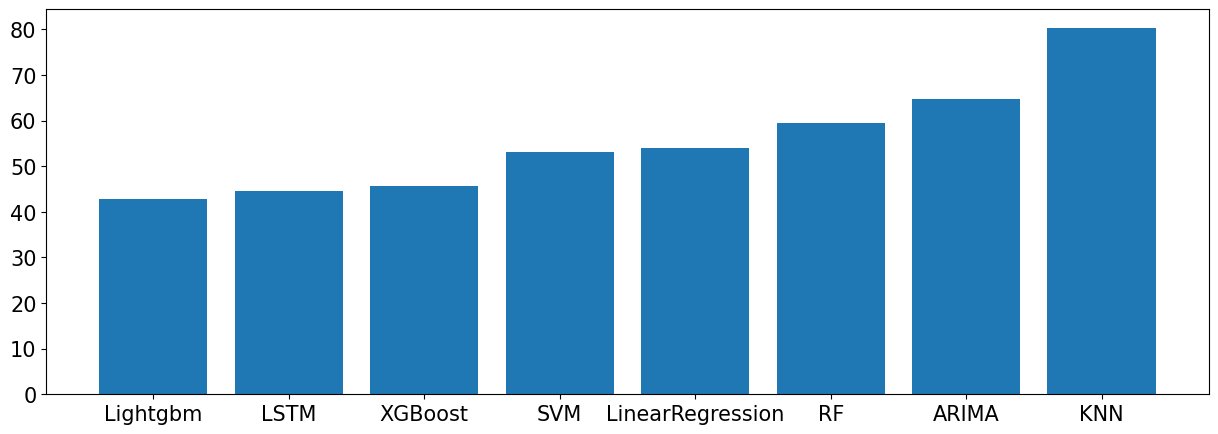

In [155]:
df_rmse=df.sort_values(by='rmse')
plt.bar(df_rmse.index, df_rmse.rmse)

<BarContainer object of 8 artists>

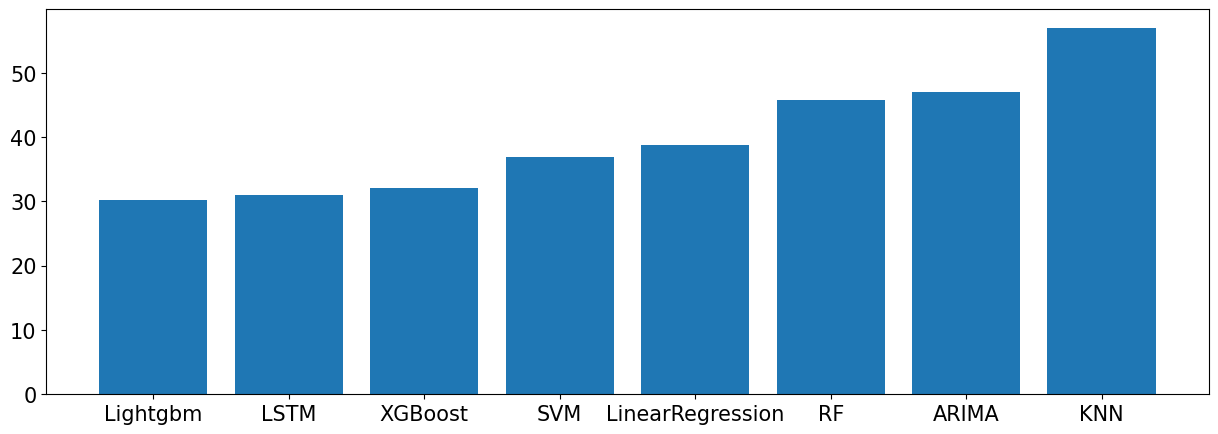

In [156]:
df_mae=df.sort_values(by='mae')
plt.bar(df_mae.index, df_mae.mae)

<BarContainer object of 8 artists>

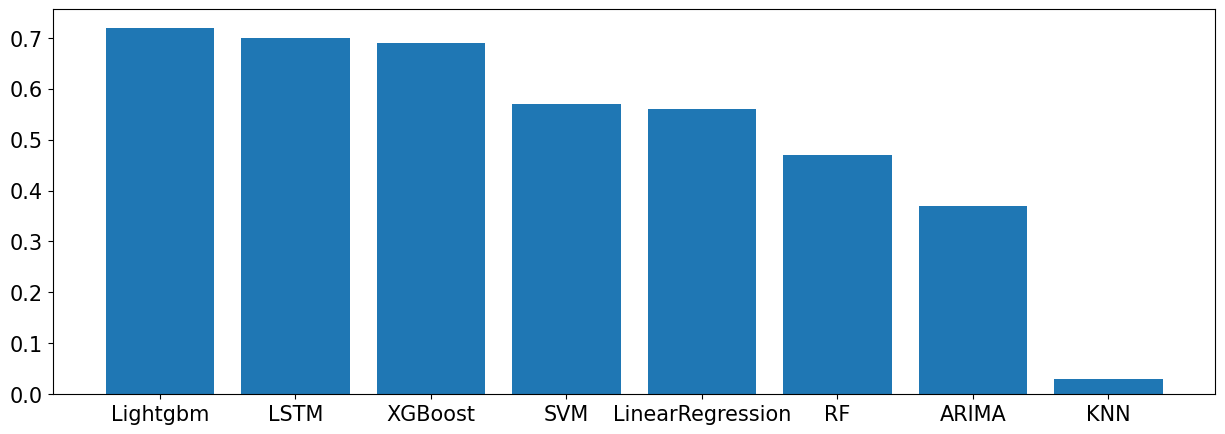

In [157]:
df_r2=df.sort_values(by='r2', ascending=False)
plt.bar(df_r2.index, df_r2.r2)
#설명력